## Exercício para Entrega 2
#### Professor: Magno Teofilo Madeira da Silva

#### Aluno: 
    Fábio Calça Carvalho
    NUSP: 11804716

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Entendendo o dataset

In [2]:
data_df = pd.read_csv("circles_and_squares.csv")
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
# Converter os dados para formato numpy
data = data_df.to_numpy()

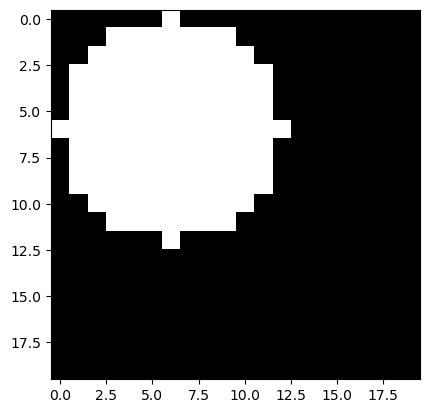

In [4]:
img = data[0, :-1].reshape((20,20))
plt.imshow(img, cmap='gray')

### Função de ativação (sinal)
Será necessário definir a função de ativação $\varphi(\cdot)$ com o auxílio da biblioteca NumPy, que retornará 1 caso a entrada da função seja maior ou igual a 0, e -1 caso contrário.

In [5]:
def sgn(x):
    return np.where(x>=0, 1, -1)

### Treinamento do Percéptron
Agora, será definido a função perceptron que recebe a matriz de entrada e os parâmetros $\eta$ (passo da iteração), $N_e$ (número de épocas) e $N_b$ (tamanho do mini-batch) e retorna a matriz de pesos.

In [6]:
def perceptron(Xd, eta, Ne, Nb):
    ones = np.ones([Xd.shape[0], 1]) # Coluna de uns para o bias
    X = np.column_stack((ones, Xd[:,:-1])) # Criando a matriz X 
    d = Xd[:, -1] #Cria o vetor com as respostas
    
    #Criando os vetores utilizados no perceptron
    w = np.zeros(len(X[1]))
    v = np.zeros(len(X[:,1]))
    y = np.zeros(len(X[:,1]))
    e = np.zeros(len(X[:,1])) 
    
    Nt = len(X)
    Nmb = int(Nt/Nb - 1)
    for k in range(1, Ne):
        #Misturar a matriz
        np.random.shuffle(Xd)
        X = np.column_stack((ones, Xd[:,:-1])) # Criando a matriz X 
        d = Xd[:, -1] #Cria o vetor com as respostas
        for l in range(Nmb):
            v[l] = X[l].T @ w 
            y[l] = sgn(v[l])
            e[l] = d[l]-y[l]
            w = w + (eta/Nb)*X[l]*e[l]
    return w

Agora, será escolhido os parâmetros da função percéptron e será realizado o treinamento para obter os pesos. A matriz de treinamento será os 800 primeiros dados, deixando os 200 dados finais para a matriz de testes.

In [7]:
Xd_train = data[:800, :]
eta = 1e-4
epochs = 2000
batch_size = 1
weights = perceptron(Xd_train, eta, epochs, batch_size) #Define os pesos com os dados de treino

#### Aplicação dos pesos nos dados de teste
Finalmente, os pesos do percéptron serão aplicados ao teste para obter a acurácia do modelo. Para isso, será realizada a multiplicação da matriz de testes pelo vetor de pesos, para aplicar a função de ativação e comparar quantas vezes o valor obtido foi igual ao valor real dos dados originais.

In [8]:
Xd_test = data[800:, :]
ones = np.ones((Xd_test.shape[0],1))
X_test = np.column_stack((ones,Xd_test[:,:-1]))
accuracy = np.mean(sgn(X_test @ weights) == data[800:,-1])
print(f"A acurácia do perceptron nos testes foi de: {accuracy*100} %")

A acurácia do perceptron nos testes foi de: 72.0 %
